#Imports


In [ ]:
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline 

In [ ]:
# Download all data if needed
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/fpp2/goog.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/fpp2/sunspotarea.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/fpp2/ausair.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_AMZN.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_MSFT.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_YHOO.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_CSCO.csv
!wget https://raw.githubusercontent.com/LesiaR/Datasets-base/main/tute1.csv
!wget https://raw.githubusercontent.com/LesiaR/Datasets-base/main/U.S._Natural_Gas_Residential_Consumption1.csv
!wget https://raw.githubusercontent.com/LesiaR/Datasets-base/main/tourism.xlsx
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/fpp2/arrivals.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/fpp2/euretail.csv
!wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/fpp2/livestock.csv

# Functions

In [ ]:
# Function for basic timeseries plotting
def plot(series, title='Time', width=10, height=6):
  plt.figure(figsize=(width, height))
  plt.plot(series)
  plt.title(f'Visualization for {title} series')

In [ ]:
# Helper function for splitting years and quarters string
def split_data(series):
  years = []
  quarters = []
  for s in series:
      years_quarters = str(s).split('.') 
      years.append(years_quarters[0])
      quarters.append(years_quarters[1])
  return years, quarters

# Function for converting year.quarter string format to datetime index
def replace_quarters_to_date_index(df, series):
  df['years'], df['quarters'] = split_data(series) # creating columns with years and quarters

  vals_to_replace = {'0':'03', '25':'06', '5':'09', '75':'12'} 
  df.quarters = df.quarters.map(vals_to_replace) # replacing quarters with correct values

  df['date']=df.years+df.quarters # combining years and quarters values
  df['date']=pd.to_datetime(df['date'], format='%Y%m')
  df.set_index('date', inplace=True) # setting datetime index

  df['years']=df['years'].astype(int) # converting year to integer for future using it in seasonal plot
  return df

# Ex 1
Use the help function to explore what the series gafa_stock, PBS, vic_elec and pelt represent.

Use autoplot() to plot some of the series in these data sets.
What is the time interval of each series?

## Google Stock data

In [ ]:
# Reading the data
df1_1 = pd.read_csv('goog.csv', index_col=["Index"])
df1_1.head()

,x
Index,
1,392.830017
2,392.512085
3,397.305908
4,398.011322
5,400.490204


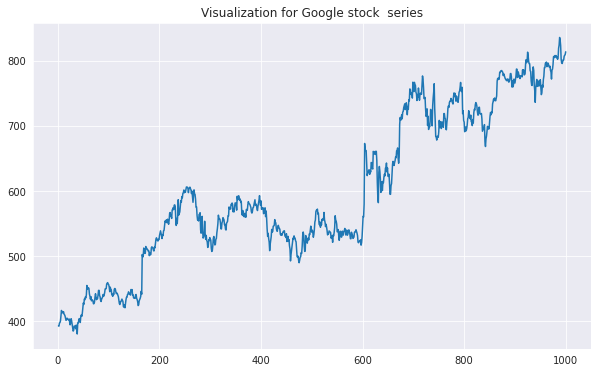

In [ ]:
# Visualization for the series
plot(df1_1.x, 'Google stock ')

Most probably time interval is one day for this series as it is stock data. Series has updawn trend, regarding cycle and seasonality more information and analysis needed (indexes are just numbered not datatime format).

## Sunspots data

In [ ]:
# Reading the data
df1_2 = pd.read_csv('sunspotarea.csv', index_col=["Index"])
df1_2.head()

,x
Index,
1875,213.133333
1876,109.283333
1877,92.858333
1878,22.216667
1879,36.333333


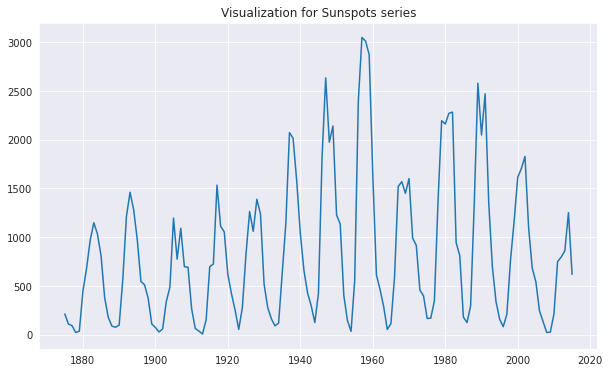

In [ ]:
# Visualization for the series
plot(df1_2.x, 'Sunspots')

* For this dataset time interval is 1 year. 
* We can see cyclic behaviour every 9-11 years, refer to it as cycle because it repeating pattern is not exactly the same and period is bigger then 1 year and not strictly the same.
* Trend is upward to ~1957 year and after is downward. 

## Australian air travel dataset

In [ ]:
# Reading the data
df1_3 = pd.read_csv('ausair.csv', index_col=["Index"])
df1_3.head()

,x
Index,
1970,7.3187
1971,7.3266
1972,7.7956
1973,9.3846
1974,10.6647


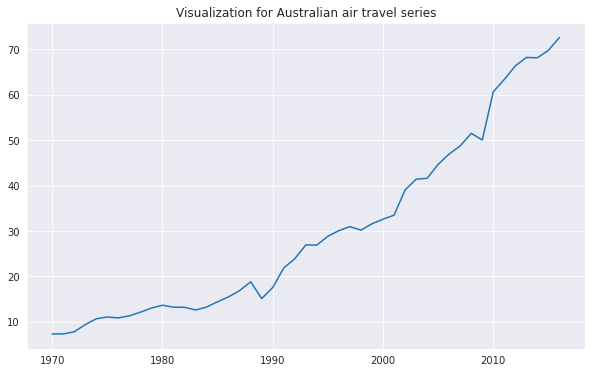

In [ ]:
# Visualization for the series
plot(df1_3.x, 'Australian air travel')

* Here we can see clear upward trend and time interval is year.
* Don't think there are some clear cycles or seasonality in this data, but more analysis can give different answer.

## US Employment data

In [ ]:
# Reading the data
df1_4 = sm.datasets.longley.load_pandas().endog
df1_4.head()

0    60323.0
1    61122.0
2    60171.0
3    61187.0
4    63221.0
Name: TOTEMP, dtype: float64

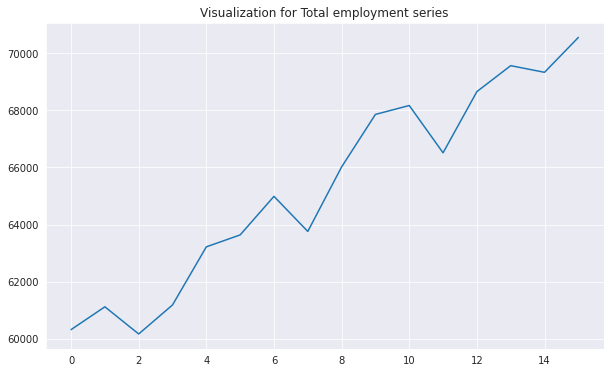

In [ ]:
# Visualization for the series
plot(df1_4, 'Total employment')

* For this dataset time interval is most probably year. 
* Trend is upward 
* We can see some cyclic behaviour every ~4-5 years


## US GDP data

In [ ]:
# Reading the data
df1_5 = sm.datasets.longley.load_pandas().exog
df1_5.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


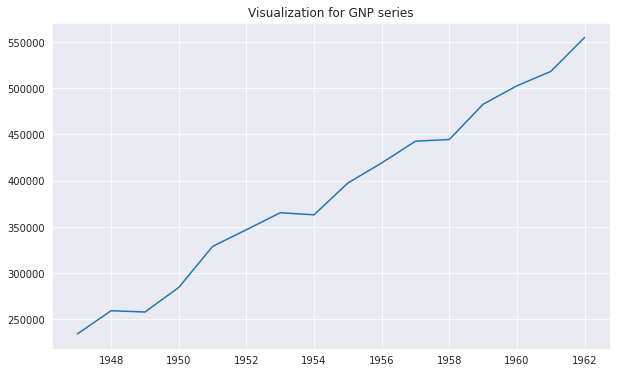

In [ ]:
# Visualization for the series
df1_5.YEAR=pd.to_datetime(df1_5['YEAR'].astype(int), format='%Y')
df1_5.set_index('YEAR', inplace=True)
plot(df1_5['GNP'], 'GNP')

* For this dataset time interval is 1 year and trend is clearly upward.
* No sesonality and some small changes -> most probably cyclic nature every ~4-5years 

# Ex 2
Use filter() to find what days corresponded to the peak closing price for each of the four stocks in gafa_stock.

In [ ]:
# Reading the data
df2_amzn = pd.read_csv('yahoo_AMZN.csv', index_col='Date')
df2_msft = pd.read_csv('yahoo_MSFT.csv', index_col='Date')
df2_yhoo = pd.read_csv('yahoo_YHOO.csv', index_col='Date')
df2_csco = pd.read_csv('yahoo_CSCO.csv', index_col='Date')

In [ ]:
# Finding the maximum closing price for every stock
amzn = df2_amzn.loc[df2_amzn.Close == df2_amzn.Close.max()]
msft = df2_msft.loc[df2_msft.Close == df2_msft.Close.max()]
yhoo = df2_yhoo.loc[df2_yhoo.Close == df2_yhoo.Close.max()]
csco = df2_csco.loc[df2_csco.Close == df2_csco.Close.max()]

In [ ]:
# Concatenating results to one frame
frames=[amzn, msft, yhoo, csco]
result = pd.concat(frames)
result[['Symbol', 'Close']]

,Symbol,Close
Date,,
2016-07-11,AMZN,753.780029
2016-07-26,MSFT,56.759998
2014-11-17,YHOO,52.369999
2016-07-26,CSCO,30.879999


On this table we can see dates for every stock when closing price was maximum. As we can see for Amazon, Microsoft and Cysco it is the same month of 2016, for Amazon and Cysco it is even the same day. For Yahoo it is 17 Nov of 2014.

# Ex 3
Download the file tute1.csv from the book website, open it in Excel (or some other spreadsheet application), and review its contents. You should find four columns of information. Columns B through D each contain a quarterly series, labelled Sales, AdBudget and GDP. Sales contains the quarterly sales for a small company over the period 1981-2005. AdBudget is the advertising budget and GDP is the gross domestic product. All series have been adjusted for inflation.
1. Read the data
2. Covert to time series
3. Construct time series plots of each of the three series
4. Check what happens when you don’t include facet_grid().

In [ ]:
# Reading the data
df3 = pd.read_csv('tute1.csv')
df3.head()

,Quarter,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


In [ ]:
# Converting to Time series
df3.set_index(pd.to_datetime(df3.Quarter), inplace=True)

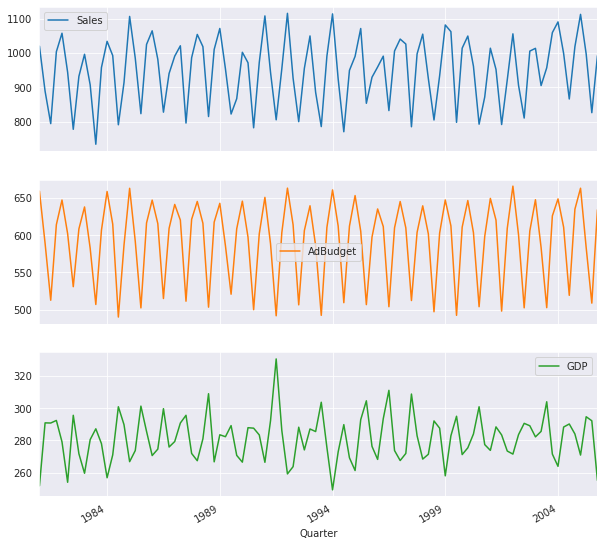

In [ ]:
# Visualization for every time series separately
df3.plot(subplots=True, layout=(3, 1), figsize=(10,10));

* From this plot we can see that every time series has yearly seasonality, for Sales and AdBudget peaks and troughs are in the same moment of time, because more advertising usually give more sales.
* The most seasonal is Sales data, the less seasonal is GDP data.
* for GDP peaks are when in Sales and AdBudget are trouhgs. I think it can be explained by money flow latency to GDP from sales (taxes are paid in the end of period etc). Also GDP can be affected by many factors not only by sales.

To do something similar as 'don’t include facet_grid()' in R I just plotted all series in one plot.

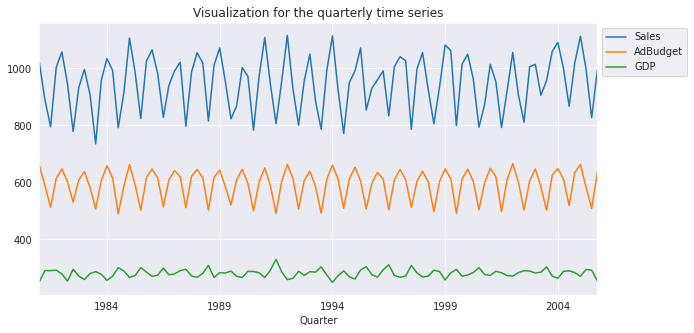

In [ ]:
# Visualization for all time series in one plot
df3.plot(figsize=(10,5))
plt.title('Visualization for the quarterly time series')
plt.legend(bbox_to_anchor=(1,1));

* This plot helps to see difference in values and magnitudes for every series. 
* Sales has the biggest and GDP the smallest. 
* And looks kile there is no trend for every of this series in the observed periods.

# Ex 4
The USgas package contains data on the demand for natural gas in the US.
Create a tsibble from us_total with year as the index and state as the key.
Plot the annual natural gas consumption by state for the New England area
* data was changed to U.S._Natural_Gas_Residential_Consumption and it doen't have states so I just grouped it by year

In [ ]:
# Reading the data
df4 = pd.read_csv('U.S._Natural_Gas_Residential_Consumption1.csv')
df4.head()

,Month,U.S. Natural Gas Residential Consumption Million Cubic Feet
0,Jun-21,128129
1,May-21,215105
2,Apr-21,340762
3,Mar-21,566833
4,Feb-21,860364


In [ ]:
# Converting index from monthly data
df4['Month']=pd.to_datetime(df4['Month'], format='%b-%y')
df4.set_index(df4.Month, inplace=True)
df4.drop('Month', axis=1, inplace=True)

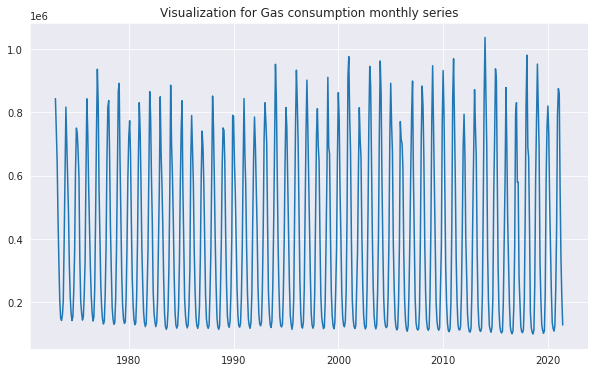

In [ ]:
# Visualization for monthly gas consumption
plot(df4['U.S. Natural Gas Residential Consumption  Million Cubic Feet'], 'Gas consumption monthly')

From monthly plot we can see yearly seasonality - peaks on the beggining and troughs in the middle of the year, which corresponds to winter and summer periods. Now let's check yearly data.

In [ ]:
# Grouping by year and summarizing gas consumption amount
df_gr =df4.groupby(df4.index.year).sum()
df_gr.head()

,U.S. Natural Gas Residential Consumption Million Cubic Feet
Month,
1973,4879386
1974,4786128
1975,4924124
1976,5051360
1977,4821483


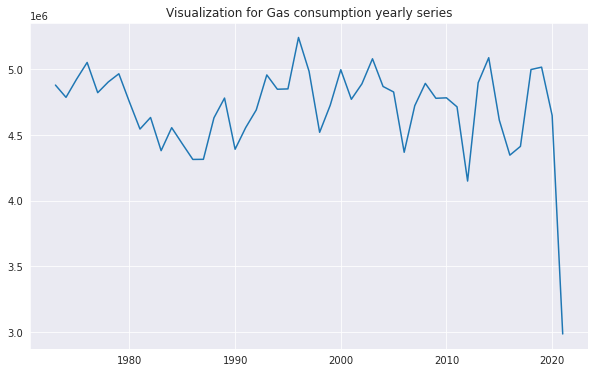

In [ ]:
# Visualization for yearly gas consumption
plot(df_gr['U.S. Natural Gas Residential Consumption  Million Cubic Feet'], 'Gas consumption yearly')

* We can see here some cyclic behaviour and downward trend in the last year, don't know what is the reason - maybe they have started to use other sources not gas, or may be winter was too warm. 

# Ex 5

## a 
Download tourism.xlsx from the book website and read it into R using readxl::read_excel().

In [ ]:
# Reading the data from excel
df5 = pd.read_excel('tourism.xlsx')
df5.head()

,Quarter,Region,State,Purpose,Trips
0,1998-01-01,Adelaide,South Australia,Business,135.077690
1,1998-04-01,Adelaide,South Australia,Business,109.987316
2,1998-07-01,Adelaide,South Australia,Business,166.034687
3,1998-10-01,Adelaide,South Australia,Business,127.160464
4,1999-01-01,Adelaide,South Australia,Business,137.448533


In [ ]:
# Converting to time series
df5['Quarter'] = pd.to_datetime(df5['Quarter'])
df5.set_index('Quarter', inplace = True)

## b 
Create a tsibble which is identical to the tourism tsibble from the tsibble package.

Not sure what was meant in this exercise so I just did a copy

In [ ]:
df5_copy=df5.copy()
df5_copy.head()

,Region,State,Purpose,Trips
Quarter,,,,
1998-01-01,Adelaide,South Australia,Business,135.077690
1998-04-01,Adelaide,South Australia,Business,109.987316
1998-07-01,Adelaide,South Australia,Business,166.034687
1998-10-01,Adelaide,South Australia,Business,127.160464
1999-01-01,Adelaide,South Australia,Business,137.448533


## c
Find what combination of Region and Purpose had the maximum number of overnight trips on average.

To find this I did grouping by Region-State with aggregating function mean(average). After that descending sorting showed me the winner.

In [ ]:
# Grouping an sorting the Trips values
df5_copy = df5_copy.groupby(['Region', 'State']).mean()
df5_copy.sort_values(by='Trips', ascending=False)

,,Trips
Region,State,
Sydney,New South Wales,505.021564
Melbourne,Victoria,425.532574
Brisbane,Queensland,307.765507
North Coast NSW,New South Wales,273.984236
Gold Coast,Queensland,220.011744
...,...,...
Wimmera,Victoria,7.780056
Adelaide Hills,South Australia,7.184743
Kangaroo Island,South Australia,5.756106


From this table we can see that Sydney-New South Wales gave us the highest average for overnight trips

## d
Create a new tsibble which combines the Purposes and Regions, and just has total trips by State.

In [ ]:
# Grouping an sorting the Trips values
df5_gr= df5.groupby('State').sum()
df5_gr.sort_values(by='Trips', ascending=False)

,Trips
State,
New South Wales,557367.430368
Victoria,390462.911453
Queensland,386642.911752
Western Australia,147819.653238
South Australia,118151.348155
Tasmania,54137.094786
ACT,41006.585207
Northern Territory,28613.683011


As we can see if to group by state then the biggest amount of trips has New South Wales.

# Ex 6 -> for this exercise time plotting is done in Ex 1
For the last plot, modify the axis labels and title

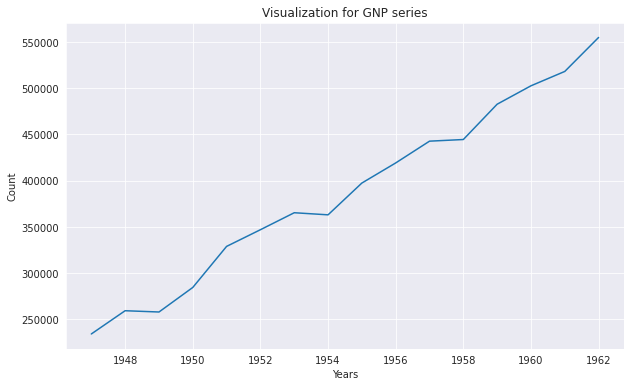

In [ ]:
# Visualization for the series with modified title, y and x axis
plot(df1_5['GNP'], 'GNP')
plt.xlabel('Years')
plt.ylabel('Count');

# Ex 7
The aus_arrivals data set comprises quarterly international arrivals to Australia from Japan, New Zealand, UK and the US.
Use autoplot(), gg_season() and gg_subseries() to compare the differences between the arrivals from these four countries.
Can you identify any unusual observations?

In [ ]:
# Reading the data
df7 = pd.read_csv('arrivals.csv')
df7.head()

,Index,Japan,NZ,UK,US
0,1981.00,14.763,49.140,45.266,32.316
1,1981.25,9.321,87.467,19.886,23.721
2,1981.50,10.166,85.841,24.839,24.533
3,1981.75,19.509,61.882,52.264,33.438
4,1982.00,17.117,42.045,53.636,33.527


In [ ]:
# Transforming Index feature to datetime index
df7 = replace_quarters_to_date_index(df7, df7.Index)

## Timeplot (autoplot)

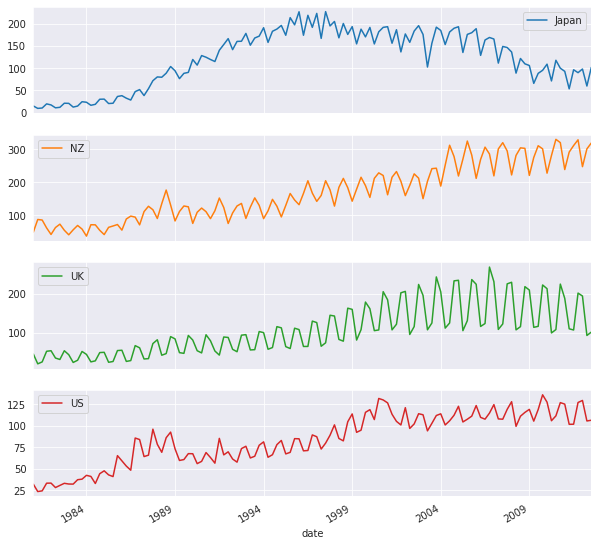

In [ ]:
# Timeplot for every country separately
list_countries = ['Japan', 'NZ', 'UK', 'US']
df7[list_countries].plot(subplots=True, layout=(4, 1), figsize=(10,10));

* From this plot we can see that arrivals from NZ and US are increasing with years, for US they are on more or less constant trend level from 2000 year, for Japan after 1996 we observe decreasing trend. 
* For all countries there is clear seasonality in arrivals. Will check more on seasonal plots

Text(0.5, 1.0, 'Visualization for arrivals time series')

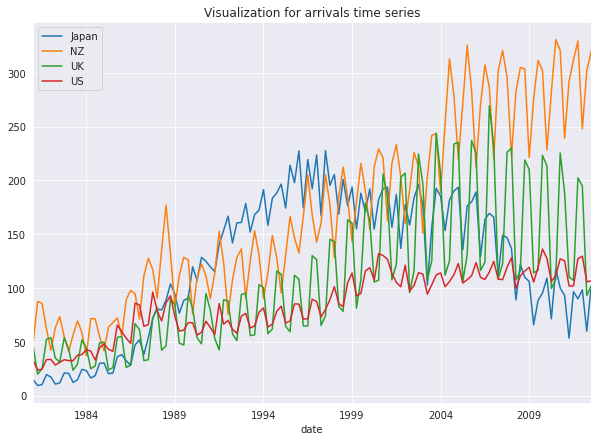

In [ ]:
# Visualization for all countries together
df7[list_countries].plot(figsize=(10,7))
plt.title('Visualization for arrivals time series')

When we plotted all countries together then it is visible that the biggest arrivals are from NZ last years. And also NZ and UK have the biggest seasonality magnitudes. US has pretty small arrivals, and from Japan it is rapidly decreasing after 1995.

## Seasonal plot

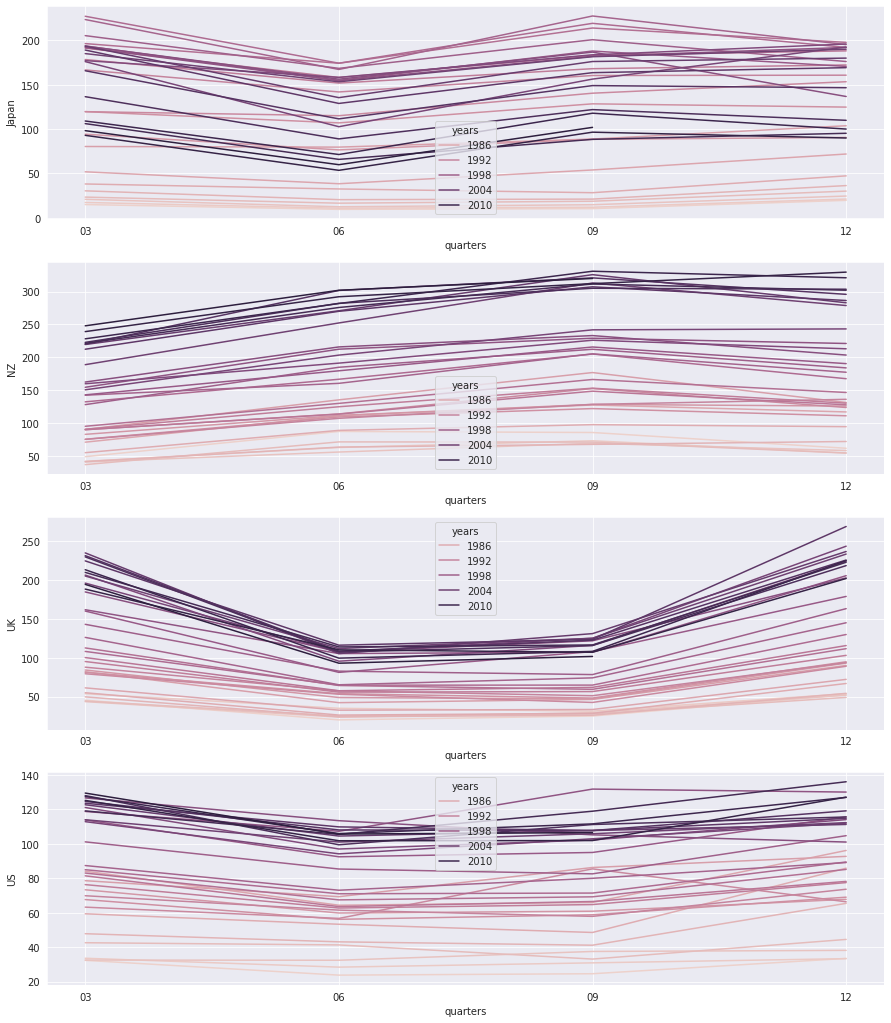

In [ ]:
# Seasonal plot for every country
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 18))
sns.lineplot(data=df7, x='quarters', y='Japan', hue='years', ax=ax1)
sns.lineplot(data=df7, x='quarters', y='NZ', hue='years', ax=ax2)
sns.lineplot(data=df7, x='quarters', y='UK', hue='years', ax=ax3)
sns.lineplot(data=df7, x='quarters', y='US', hue='years', ax=ax4)

* From Japan: after 1998 arrivals have clear seasonality - trough in Q2 quarter, peak in Q3 quarter. Before 1998 seasonality was much less visible.
* From NZ: seasonnality is present, in Q3 quarter there is a peak, in Q1 ther is a tough, also seasonality become more clear after 1992. In timeplot we also saw this increasing via magnitude.
* From UK: clear seasonality increasing with years - peak in Q4 and Q1, tough in Q2 and Q3. After 1998 seasonality become bigger.
* From US: Not the same seasonality over years - for some years in Q3 there is a peak, for some no peak. No seasonality before 1992.

## Seasonal subseries plot

Now let's check all our assumptions with help of sublots.

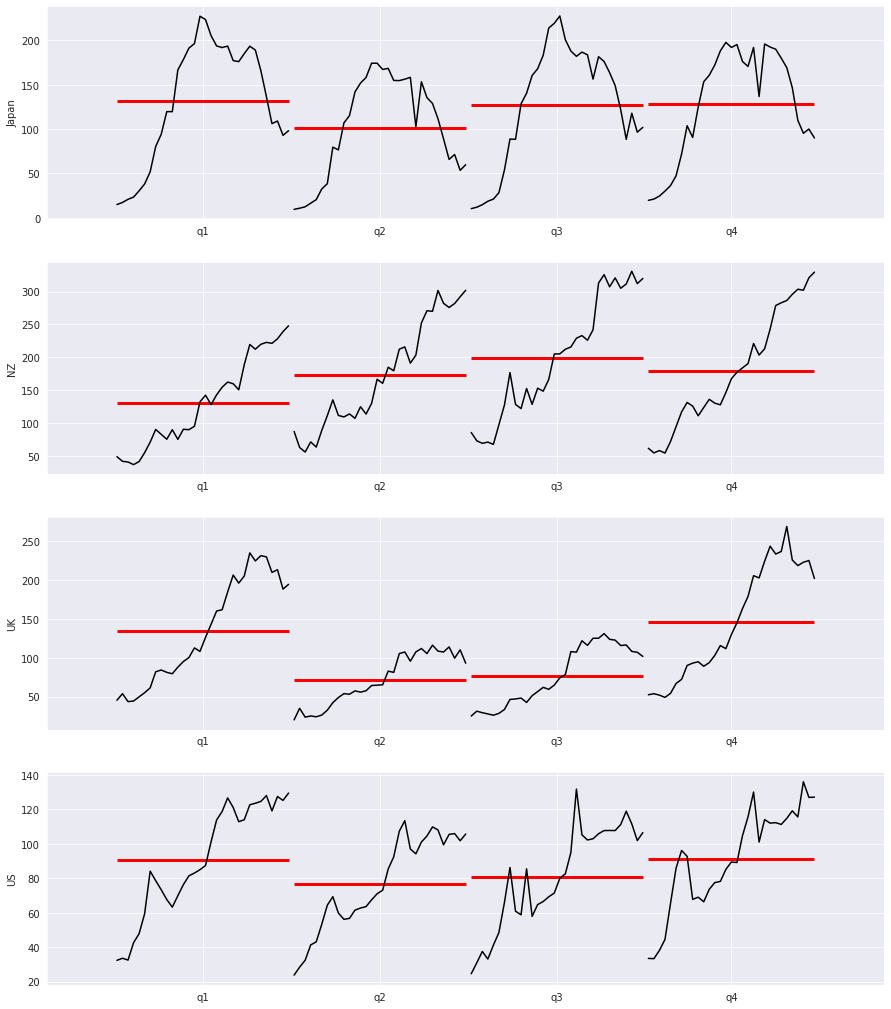

In [ ]:
# Seasonal subseries plot for every country
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 18))
sm.graphics.tsa.quarter_plot(df7.Japan, ax=ax1, ylabel='Japan')
sm.graphics.tsa.quarter_plot(df7.NZ, ax=ax2, ylabel='NZ')
sm.graphics.tsa.quarter_plot(df7.UK, ax=ax3, ylabel='UK')
sm.graphics.tsa.quarter_plot(df7.US, ax=ax4, ylabel='US');

* For Japan we see clear peak in Q2 and changing trend ~1995
* For NZ we have Q1 trough, Q3 peak and upward trend over years for every quarter.
* For UK we have Q2+Q3 trough, Q4 peak and downward trend for last years
* For US very small differences in means (small seasonality) and upward trend.

So seasonal sublot helped to confirm and clarify information gained from previous plots.

# Ex 8
Explore retail time series using the following functions:
autoplot(), gg_season(), gg_subseries(), gg_lag(), ACF() %>% autoplot()

Can you spot any seasonality, cyclicity and trend? What do you learn about the series?

In [ ]:
# Reading the data
df8 = pd.read_csv('euretail.csv')
df8.head()

,Index,x
0,1996.00,89.13
1,1996.25,89.52
2,1996.50,89.88
3,1996.75,90.12
4,1997.00,89.19


In [ ]:
# Transforming Index feature to datetime index
df8 = replace_quarters_to_date_index(df8, df8.Index)

## Timeplot (autoplot)

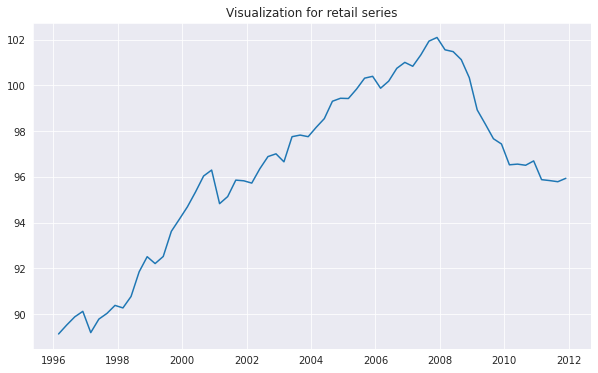

In [ ]:
# Timeplot for retail data
plot(df8.x, 'retail')

From timeplot we can see changing trend - upward to 2008 and downward after.

## Seasonal plot

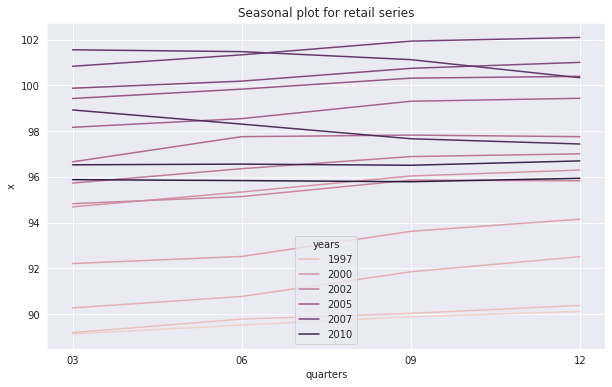

In [ ]:
# Seasonal visualization for retail data
plt.figure(figsize=(10,6))
sns.lineplot(data=df8, x='quarters', y='x', hue='years')
plt.title('Seasonal plot for retail series');

On this plot there is no very clear seasonality in data.

## Seasonal subseries plot

Not sure why but default parameters in imports section rcParams['figure.figsize'] = 12, 8 are not working here, I see plot smaller. And the same for ACF plots. All is visible anyway, so I didn't change anything.

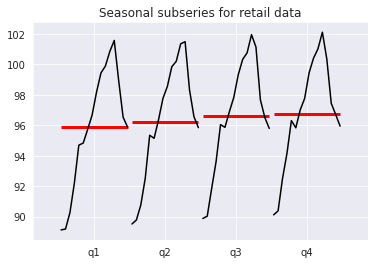

In [ ]:
# Seasonal subplots for retail data
sm.graphics.tsa.quarter_plot(df8.x)
plt.title('Seasonal subseries for retail data');

Seasonal subplot confirmes previous assumptions: seasonality is so small that can be omitted (means are almost on the same level), trend changed it's direction from upward to downward somewhere in the 2007.

## Lag plot

To have lag plot which has Quarters as a hue colored with separate colors I've used added lag features and scatterplots within FacetGrid. But also I found lag_plot function from pandas.plotting, but couldn't add hue there. That's why to be able to reproduce exactly what is doing R's lag function I've used next code. 
Maybe you have some suggestion how it could be done with pandas lag_plot as it looks more easier for me.


In [ ]:
# Creating lag features
lags = {} 
for i in range(1, 10):
    lags['Lag' + str(i)] = df8.x.shift(i)

# Merging lag features with main dataframe
lagged_df = pd.DataFrame.from_dict(lags).merge(df8[['x', 'quarters']], left_index=True, right_index=True)

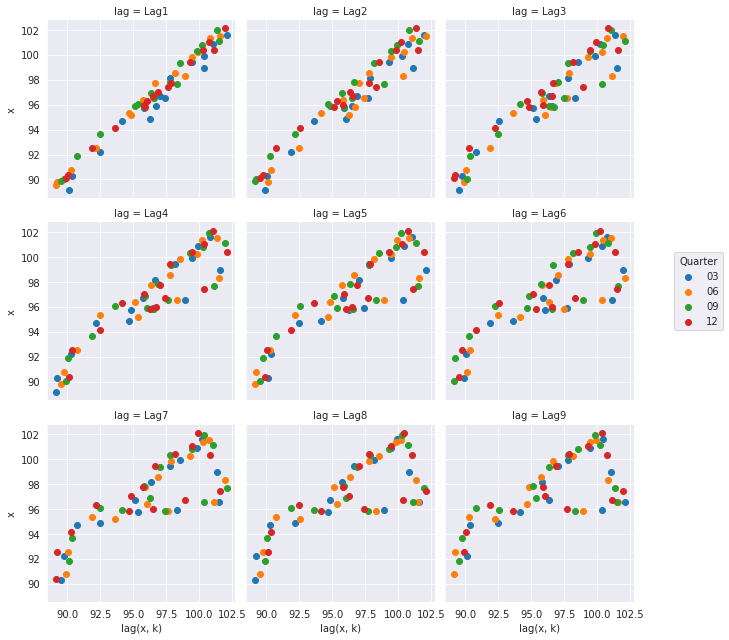

In [ ]:
# Visualization for lag plots from 1 to 9 lag
lag_long = lagged_df.melt(id_vars=['x', 'quarters'], value_name='lag(x, k)', var_name='lag')
p = sns.FacetGrid(lag_long, col='lag', col_wrap=3, hue='quarters')
p.map_dataframe(plt.scatter, x='lag(x, k)', y='x')
plt.legend(bbox_to_anchor=(1.5,2), title='Quarter');

From lag plots we can see that data is very highly correlated for 1-3 lags, 4-6 lags - moderate correlation, with later lags correlation become not so significant.
There is no groups of points within one quarter, they are distributed over all parts of scatterplots. I assume it is because we don't have seasonality.

## ACF plot

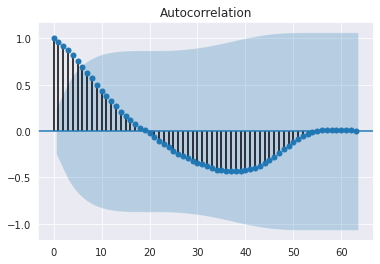

In [ ]:
# ACF autoplot for retail data
plot_acf(df8.x, lags=63);

From ACF plot we can see high positive autocorrelation for 1-6 lags. Also there is no repetitive peaks which means no seasonality. And as correlation from positive become negative with increasing peaks in negative direction. It can tell about changing trend. Last years have stable trend. So all our assumptions from first plots confirmed.

# Ex 9
Use the following graphics functions: autoplot(), gg_season(), gg_subseries(), gg_lag(), ACF() and explore features from the following time series: “Total Private” Employed from us_employment

Can you spot any seasonality, cyclicity and trend?

What do you learn about the series?

What can you say about the seasonal patterns?

Can you identify any unusual years?

For this task we will not use seasonal plots as data is yearly

In [ ]:
# As there was no date indexing in this data I've added them from US GDP data
df1_4 = pd.DataFrame(df1_4)
df1_4.set_index(df1_5.index, inplace=True)

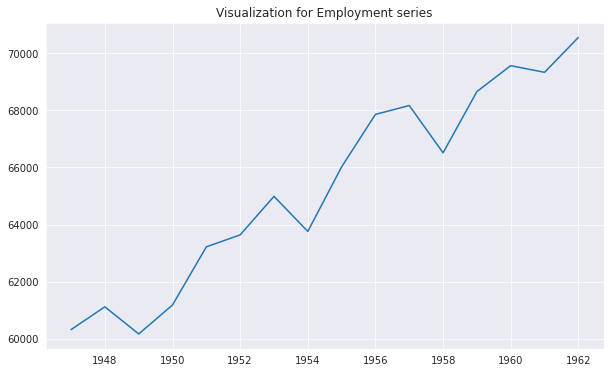

In [ ]:
# Timeplot for Total employment
plot(df1_4.TOTEMP, 'Employment')

From timeplot we can see upward trend and some cycle with troughs in 1948, 1954, 1958, 1961.

As we don't have seasonal component here and no need in hue parameter - I just did few lag plots with lag_plot function from pandas.plotting.

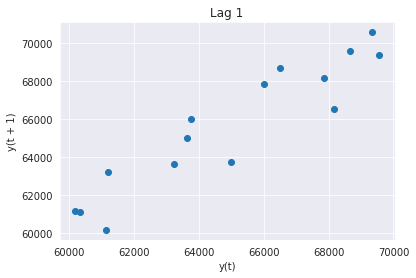

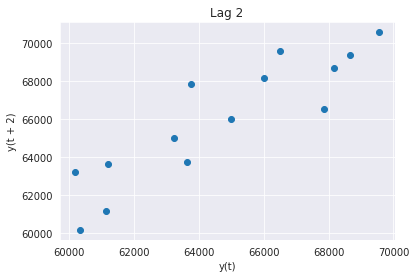

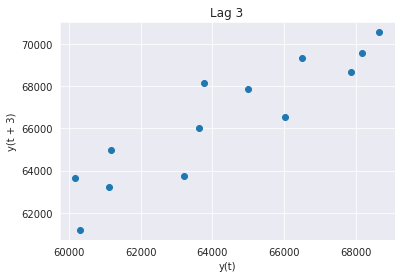

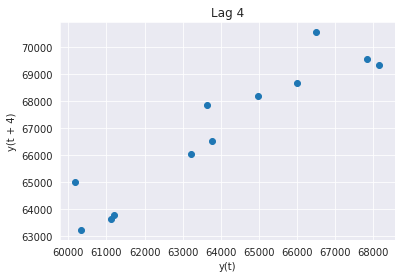

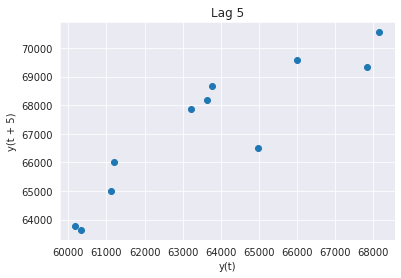

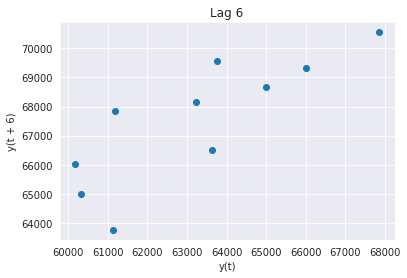

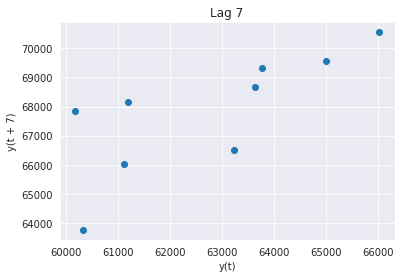

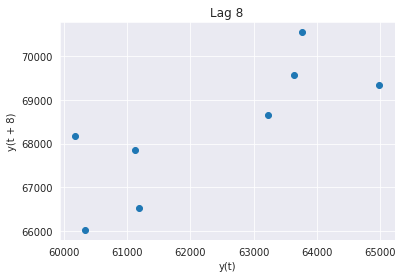

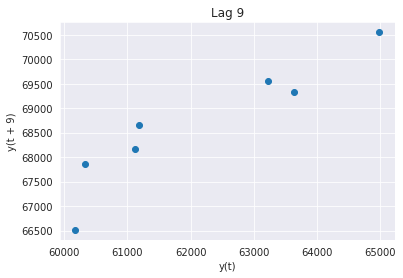

In [ ]:
for i in range(1, 10):
  lag_plot(df1_4.TOTEMP, lag=i)
  plt.title(f'Lag {i}')
  plt.show()

From lag plots we can see autocorrelation for first 4 lags.

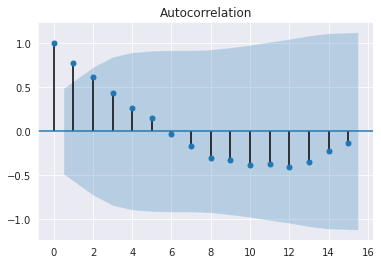

In [ ]:
# ACF autoplot for total employment
plot_acf(df1_4.TOTEMP, lags=15);

We can see here significant autocorrelation for 1-2 lags and not very for others. Also no seasonality (it should not be here but just to confirm). Regarding trend I'm not sure - it is definitely trended data as peaks decreasing, but after 6 lag autocorrelation become negative with changing peaks magnitudes. I think it is about troughs in cycle in some years.

# Ex 10

1. B (data has some trend and no clear seasonality)
2. A (no obvious trend, yearly seasonality, 12 months-peaks in ACF)
3. D (trended data->decreasing peaks on ACF, yearly seasonality 12 months-peaks)
4. C (10-periods seasonality on ACF corresponds to 10 years in timeplot. Here not sure if 10 years can be called seasonality or it's more cycle)

# Ex 11
The aus_livestock data contains the monthly total number of pigs slaughtered in Victoria, Australia, from Jul 1972 to Dec 2018. Use filter() to extract pig slaughters in Victoria between 1990 and 1995. Use autoplot() and ACF() for this data. How do they differ from white noise? If a longer period of data is used, what difference does it make to the ACF?

In [ ]:
# Reading the data
df11 = pd.read_csv('livestock.csv')
df11.head()

,Index,x
0,1961,232.288994
1,1962,229.536258
2,1963,233.145936
3,1964,243.763684
4,1965,252.602916


In [ ]:
# Converting to time series 
df11['Index'] = pd.to_datetime(df11['Index'],format = '%Y')
df11.set_index('Index', inplace = True)

In [ ]:
# Filtering the data by years
filtered = df11.loc['1990-01-01':'1995-01-01']

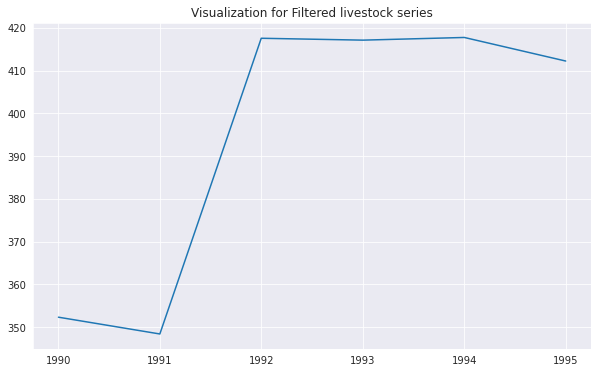

In [ ]:
# Timeplot for filtered data
plot(filtered.x, 'Filtered livestock')

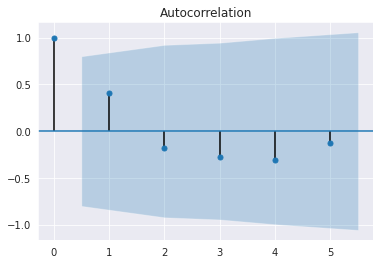

In [ ]:
# ACF plot for filtered data
plot_acf(filtered.x, lags=5);

From this small subset of data we can assume that maybe data close to white noise because only 1 lag has significant autocorrelation. Let's check with bigger amount of data forward.

In [ ]:
# Filtering for all years after 1990
filtered_bigger = df11.loc['1990-01-01':]

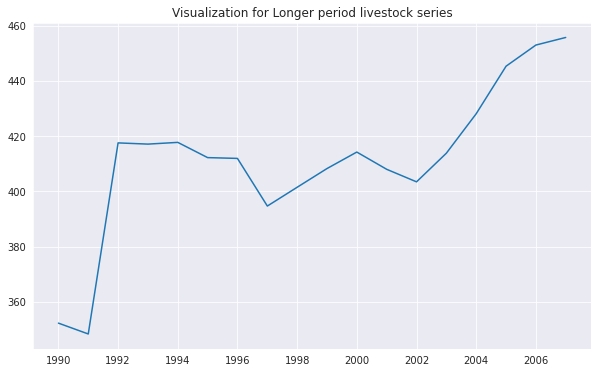

In [ ]:
# Timeplot for longer period of data
plot(filtered_bigger.x, 'Longer period livestock')

Here we can see some more or less upward trend already and some cycle. Let's check ACF.

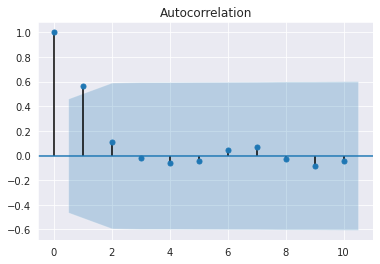

In [ ]:
# ACF plot for longer period of data
plot_acf(filtered_bigger.x, lags=10);

From ACF plot we can see 2 changes:
* 2 lags are significant(1 and 2) so most probably data is not white noise. But still no certain because all other lags are very small.
* Area of significance become smaller if to compare with previous data (as the more T we have the smaller blue area is).

To be absolutly sure about the data I've plotted all of it.

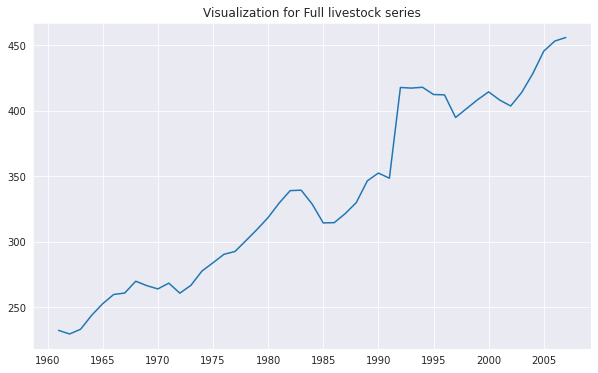

In [ ]:
# Timeplot for all data
plot(df11.x, 'Full livestock')

On this plot upward trend and cycle are clearly visible.

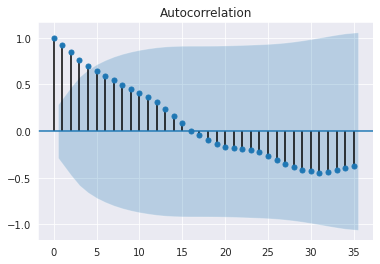

In [ ]:
# ACF plot for all data
plot_acf(df11.x, lags=35);

From ACF I can say that data is not white noise because first 5 lags are highly correlated.

#Ex 12

## a
Compute the daily changes in Google closing stock prices

For this task data from Ex 1.1 is used

In [ ]:
df1_1.head()

,x
Index,
1,392.830017
2,392.512085
3,397.305908
4,398.011322
5,400.490204


In [ ]:
# Addidng differencing column to dataframe
df1_1['diff'] = df1_1.x - df1_1.x.shift(1)

## b
Why was it necessary to re-index the tsibble?

In [ ]:
# Dataframe with difference feature
df1_1.head()

,x,diff
Index,,
1,392.830017,NaN
2,392.512085,-0.317932
3,397.305908,4.793823
4,398.011322,0.705414
5,400.490204,2.478882


It is necessary to re-index the series as first value is NaN and we cann't calculate the difference here because nothing to compare with, no previous value.

In [ ]:
# Reindexing diff series
reindexed=df1_1[1:]['diff']
reindexed.index -= 1 

## c
Plot these differences and their ACF.

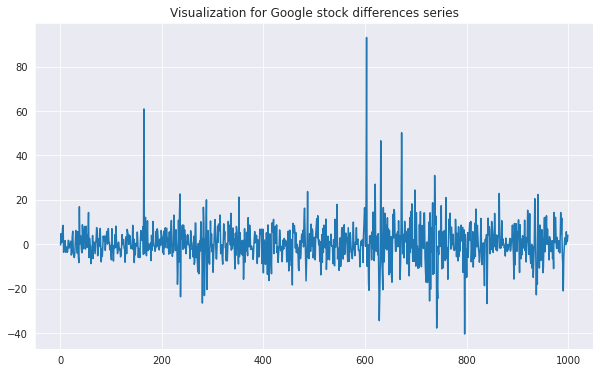

In [ ]:
# Plotting the differences
plot(reindexed, 'Google stock differences')

Here on differences plot we have some places of data increasing, let's check them on ACF.

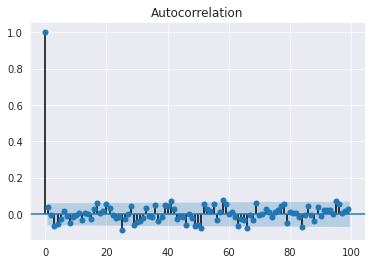

In [ ]:
# ACF autoplot for differences
plot_acf(reindexed, lags=99);

## d
Do the changes in the stock prices look like white noise?

At first glance data is very close to white noise despite 1 first peak. But if to look on the peaks on ACF there are some peaks which slightly bigger then blue area. And that is not 1 or 2 peaks, it is around 12, so more then 5% of data. 

And this confirms that data **is not white noise**.